# Temporal filtering of a GTFS feed

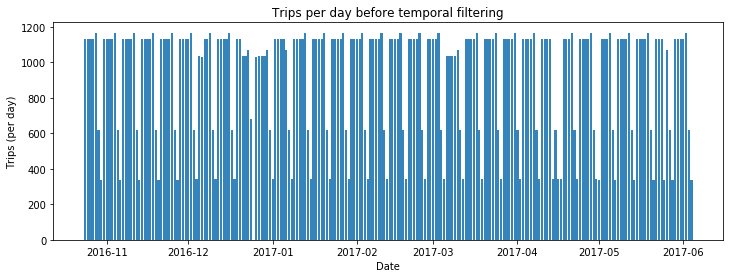

In [20]:
import sys
sys.path.append("../") # for using development version of gtfspy

import datetime
import os
from matplotlib import pyplot as plt

from example_import import load_or_import_example_gtfs
from gtfspy.gtfs import GTFS
from gtfspy.filter import FilterExtract
from gtfspy import mapviz

G = load_or_import_example_gtfs()

f, ax = plt.subplots(figsize=(12,4))
daily_trip_counts = G.get_trip_counts_per_day()
datetimes = [date.to_pydatetime() for date in daily_trip_counts['date']]
trip_counts = daily_trip_counts['trip_counts']
ax.bar(datetimes, trip_counts, color="C0", alpha=0.9)
ax.set_xlabel('Date')
ax.set_ylabel('Trips (per day)')
ax.set_title("Trips per day before temporal filtering")
xlim_old = ax.get_xlim()
plt.show()

Updating travel times in trips table
Updating metadata


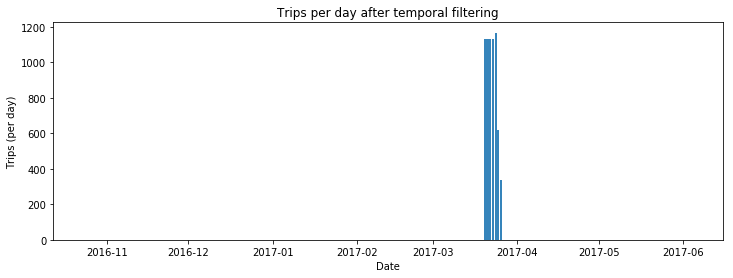

In [21]:
filtered_database_path = "test_db_kuopio.week.sqlite"
# remove the old file, if it exists
if os.path.exists(filtered_database_path):
    os.remove(filtered_database_path)

# filter by time and 3 kilometers from the city center
week_start = G.get_weekly_extract_start_date()
week_end = week_start + datetime.timedelta(days=7)
first_day_start_ut = G.get_day_start_ut(week_start)
last_day_start_ut = G.get_day_start_ut(week_end)

fe = FilterExtract(G, filtered_database_path, 
                   trip_earliest_start_time_ut=first_day_start_ut,
                   trip_latest_start_time_ut=last_day_start_ut)
fe.create_filtered_copy()

G_filtered = GTFS(filtered_database_path)
f, ax = plt.subplots(figsize=(12,4))
daily_trip_counts = G_filtered.get_trip_counts_per_day()
datetimes = [date.to_pydatetime() for date in daily_trip_counts['date']]
trip_counts = daily_trip_counts['trip_counts']
ax.bar(datetimes, trip_counts, color="C0", alpha=0.9)
ax.set_xlabel('Date')
ax.set_ylabel('Trips (per day)')
ax.set_title("Trips per day after temporal filtering")
ax.set_xlim(xlim_old)

os.remove(filtered_database_path)
plt.show()